In [67]:
import pandas as pd
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
import pickle
import streamlit
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,6)

In [25]:
df = pd.read_csv('data/creditcard.csv')

In [26]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [27]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [28]:
df.duplicated().sum()

1081

In [29]:
df.iloc[np.where(df.duplicated())]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [30]:
df.shape

(284807, 31)

In [31]:
df.drop_duplicates(inplace=True)

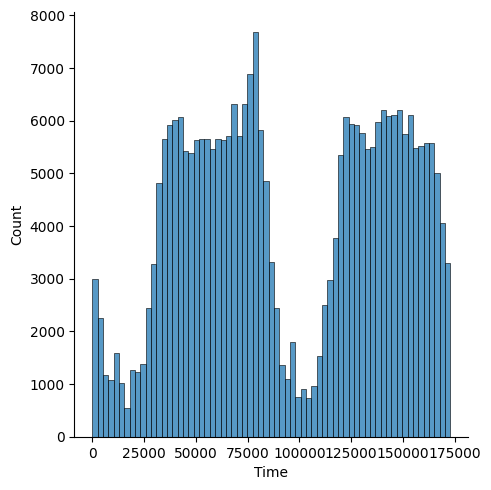

In [32]:
sb.displot(df, x = 'Time')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [34]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Axes: xlabel='Class', ylabel='count'>

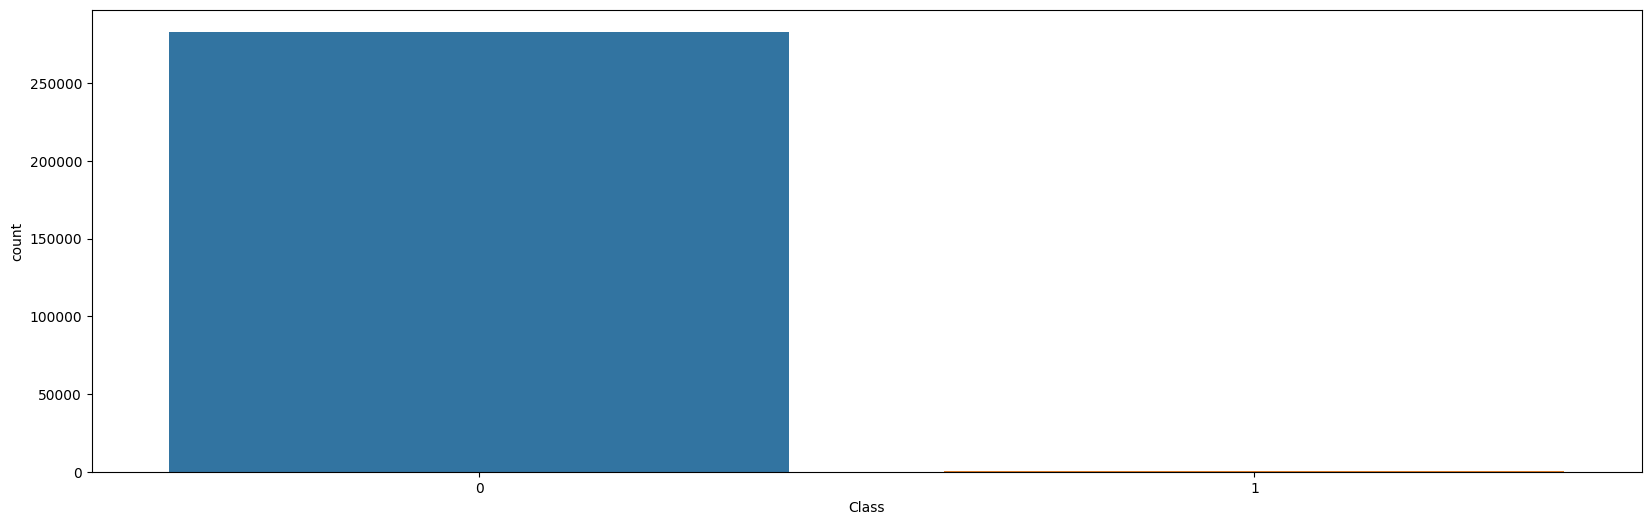

In [35]:
sb.countplot(df, x = 'Class')

In [40]:
x = df.drop('Class', axis = 1)
y = df.Class

In [43]:
upsample = ADASYN(random_state=646)
x_res, y_res = upsample.fit_resample(x, y)

In [44]:
x_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566547,168697.797529,0.146381,1.602929,-3.550060,1.500798,-0.405624,0.017246,-0.404733,-1.209571,-0.850502,...,0.348489,-0.551643,0.143448,0.043049,-0.001507,0.198065,-0.357923,0.250789,0.046105,210.592979
566548,168436.056651,-0.146352,1.832035,-3.703377,1.674022,-0.652546,0.035319,-0.504306,-1.390576,-1.077052,...,0.406563,-0.613071,0.213013,0.061325,0.069670,0.179793,-0.368757,0.290093,0.055846,237.249679
566549,170129.531631,1.407323,0.370566,-2.502421,0.421738,0.653362,-0.076240,-0.315515,0.211778,0.308287,...,0.040552,0.036407,-0.047689,-0.014517,-0.344570,0.082536,-0.122922,0.086720,0.030635,50.278286
566550,169726.736897,0.329385,0.761600,-2.353043,0.445833,-0.264416,-0.038526,-1.308478,0.728317,-0.188673,...,0.147864,0.406549,0.408533,0.091784,-0.149705,-0.342868,0.184417,0.241099,0.115344,64.563965


In [45]:
y_res

0         0
1         0
2         0
3         0
4         0
         ..
566547    1
566548    1
566549    1
566550    1
566551    1
Name: Class, Length: 566552, dtype: int64

In [48]:
y_res.value_counts()

Class
1    283299
0    283253
Name: count, dtype: int64

In [50]:
x_train, y_train, x_test, y_test = tts(x_res, y_res, random_state=234, test_size=0.2)

In [53]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
368541,44744.383017,-0.505257,0.766514,1.240570,-0.556835,-0.748629,-0.739648,-0.386881,-0.060409,0.557361,...,0.034100,0.449514,0.741763,-0.229802,0.387743,0.128343,-0.497593,0.093205,-0.012599,1.000000
33631,37378.000000,1.373948,-0.436335,-0.040047,-0.849701,-0.602990,-0.791715,-0.255350,-0.145115,-1.255055,...,0.099725,-0.167414,-0.717436,0.063927,-0.030734,0.341851,-0.527603,-0.026624,0.003250,31.000000
488900,126199.062383,-1.041996,1.899581,-3.832197,0.065562,-0.010029,-1.699597,-1.180047,0.354693,-2.702628,...,-0.247396,0.105420,-0.489936,-0.319144,0.391168,0.554598,0.769950,-0.140263,0.074887,24.284611
366070,44277.808750,-4.476606,3.524255,-5.123622,3.475434,-3.155820,-1.035879,-5.413112,0.549192,-2.159944,...,-0.311626,2.627512,-0.081701,0.297562,-0.094938,-0.254940,-0.331789,-0.297833,-0.178956,10.786757
264675,161978.000000,-0.118605,0.865244,-1.067081,-1.316553,1.605986,-0.811388,1.550777,-0.221939,-0.598844,...,0.027789,0.279199,0.868168,-0.211084,0.322065,-0.258235,0.062608,0.373526,0.263924,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423073,73965.977424,-2.465189,2.008695,-2.280961,0.645819,-2.106541,-0.827931,-1.019903,0.103717,-0.279770,...,-0.313882,0.350795,-0.225589,-0.069531,0.135199,-0.760920,-0.891332,-0.291220,0.282478,209.093284
201567,134255.000000,-0.877323,-0.866374,-0.988058,-1.439491,0.530178,-0.634837,2.754718,-0.767626,-2.335877,...,0.476403,0.195793,0.510763,0.339408,-0.455808,0.656782,0.959204,-0.296167,-0.098326,385.350000
23225,32692.000000,-0.364387,1.051710,0.546476,-0.056895,-0.043923,-0.528666,0.347060,0.369608,-0.911213,...,-0.115304,0.184717,0.391868,-0.072187,0.041019,-0.208408,0.292262,-0.116589,-0.042876,15.860000
565572,168213.903187,-1.954163,2.057492,-4.697586,2.206207,-1.405859,-0.906979,-1.350645,-1.080494,-1.895775,...,0.535567,-0.386147,0.246858,-0.060018,0.184317,-0.040616,-0.074138,0.598264,-0.020080,314.390501


In [54]:
y_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
396899,58732.377459,-3.704555,3.084926,-3.034026,3.462349,-1.725693,-1.211147,-3.122101,-0.873079,-2.030309,...,-0.074164,1.820805,-0.931750,-0.309836,0.088228,0.110788,-0.414460,-1.236878,-0.805160,39.326142
394873,58209.637384,-0.123036,1.575651,-0.423213,2.026331,0.058713,-0.972577,-0.276546,0.085250,-1.127628,...,0.093945,0.193105,0.064866,-0.232933,0.127305,0.316990,-0.174300,0.114671,0.057493,3.723826
172855,121517.000000,-1.501551,1.226098,-1.643652,-3.558932,2.396342,2.875349,-0.044177,1.731214,-0.202459,...,-0.127916,-0.230806,-0.924169,0.041114,0.700159,0.041468,0.402146,0.103002,0.090680,4.000000
15174,26586.000000,1.387707,-0.160992,0.243925,-0.540008,-0.809788,-1.152395,-0.395569,-0.279394,-1.014633,...,0.198512,-0.129069,-0.425275,0.097351,0.329909,0.278231,-0.485114,0.030074,0.047661,15.000000
400035,59324.780089,-3.806943,1.472393,-2.180612,3.596880,-0.629622,-1.268196,-4.226396,-0.253963,-1.782362,...,-0.061938,1.249096,-0.426036,-0.628825,-0.046353,-0.228619,-0.389469,-0.350474,-0.717169,26.017748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18014,29167.000000,-0.606040,0.548972,1.438107,-0.360528,1.706826,1.271955,1.131347,-0.215959,0.251030,...,-0.210222,0.107491,0.822543,-0.229647,-1.351239,-0.476860,-0.507965,-0.571497,-0.518599,4.990000
476888,102652.394306,-4.936105,4.378889,-7.976491,7.710280,-3.944696,-1.343383,-7.288680,3.334298,-3.244649,...,-0.140273,1.356253,0.848464,-0.113773,-0.315396,-0.903003,0.192570,-0.096542,-0.785880,67.830616
155282,106686.000000,1.986500,-0.081890,-1.744565,0.548252,0.422750,-0.906476,0.397518,-0.360916,1.738080,...,-0.271845,-0.074770,0.118111,-0.065201,-0.384886,0.366460,-0.214041,-0.084318,-0.083542,45.000000
432023,76906.766975,-1.309670,1.199180,-0.393521,1.346507,1.696464,-2.121652,0.335757,0.023759,-0.284367,...,-0.162875,-0.283880,-0.827502,-0.353237,0.221564,0.410307,-0.518982,0.037658,0.140923,1.000000


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     56743
           1       0.99      0.98      0.98     56568

    accuracy                           0.98    113311
   macro avg       0.98      0.98      0.98    113311
weighted avg       0.98      0.98      0.98    113311



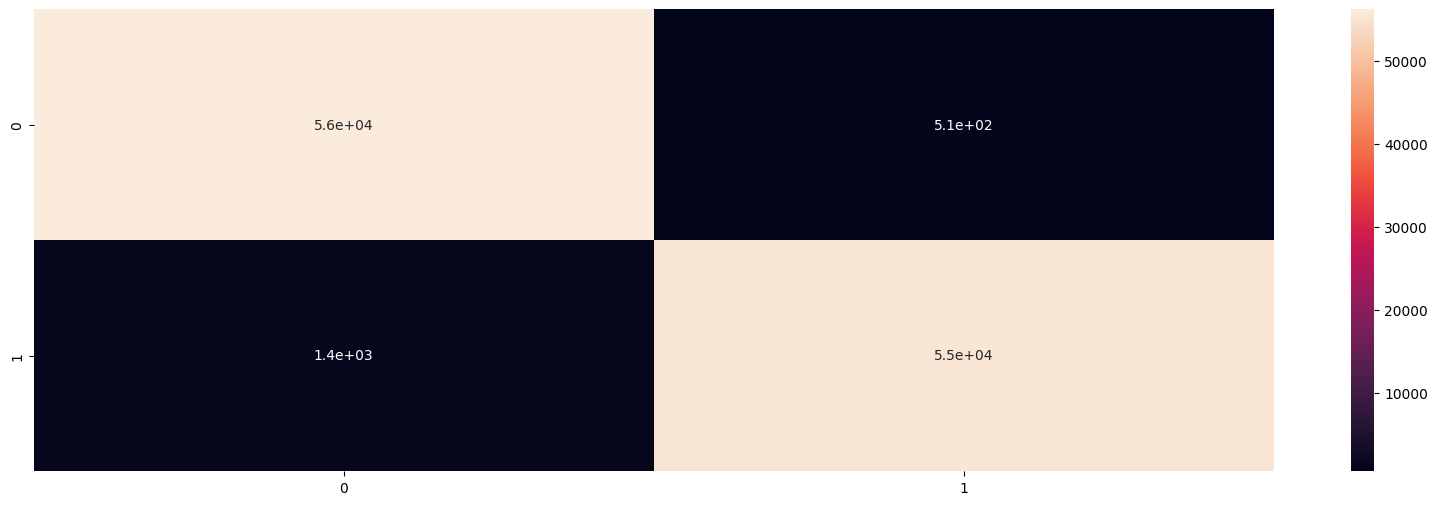

In [62]:
xgb = XGBClassifier(n_estimators = 4)
xgb.fit(x_train, x_test)
pred = xgb.predict(y_train)
print(classification_report(y_test, pred))
sb.heatmap(confusion_matrix(y_test, pred), annot = True)
plt.show()

In [68]:
'''with open('best_mod.pkl', 'wb') as f:
    pickle.dump(xgb, f)'''

"with open('best_mod.pkl', 'wb') as f:\n    pickle.dump(xgb, f)"

In [66]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
streamlit.tes